### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes

### Loading Data

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

### Data Pre-Processing

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(699, 2)

### Splitting the data

In [9]:
# train data
train_input = np.array(data["x"][:500]).reshape(500,1)
train_output = np.array(data["y"][:500]).reshape(500,1)

# test data
test_input = np.array(data["x"][500:]).reshape(199,1)
test_output = np.array(data["y"][500:]).reshape(199,1)

In [10]:
print(f"Training input data shape: {train_input.shape}")
print(f"Training Output data shape: {train_output.shape}")
print(f"Testing input data shape: {test_input.shape}")
print(f"Testing Output data shape: {test_output.shape}")


Training input data shape: (500, 1)
Training Output data shape: (500, 1)
Testing input data shape: (199, 1)
Testing Output data shape: (199, 1)


# <font color = "Green">Linear Regression</font>

## Forward Propogation

### f(x) = ŷ = mx + c

In [11]:
def forward_propogation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m,train_input) + c
    return predictions

## Cost Function

### cost = 1/2n summation(i=1 to n)((f(x) - y)^2)

In [12]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5 
    return cost

## Gradient Descent for Backward Propagation

df = summ((f(x) - y)) / n

dm = df * x

dc = df * 1

In [13]:
def backword_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives

## Update Parameters

new_m = m - (learning_rate * dm)

new_c = c - (learning_rate * dc)

In [14]:
def update_params(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    return parameters

## Model Training

In [15]:
def train(train_input, train_output, learning_rate, iters):
    # random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()
    
    #loss
    loss = list()

    #iteration
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propogation(train_input,parameters)

        #cost
        cost = cost_function(predictions, train_output)
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")

        #plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label = "Original data")
        ax.plot(train_input, predictions, "*", label = "Training")
        legend = ax.legend()
        plt.plot(train_input, train_output, "+", label = "Original data")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()

        #backward propagation
        derivatives = backword_propagation(train_input,train_output, predictions)
        
        #update the parameters
        parameters = update_params(parameters,derivatives, learning_rate)


        
    return parameters, loss



## Training

Iteration = 1, Loss = 1355.3477483475592


<Figure size 432x288 with 0 Axes>

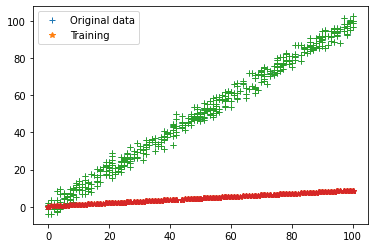

Iteration = 2, Loss = 617.0698000889623


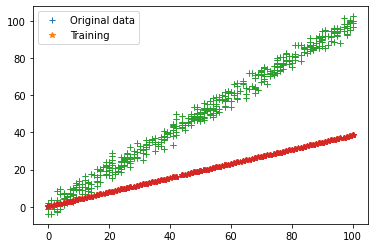

Iteration = 3, Loss = 282.11227667292616


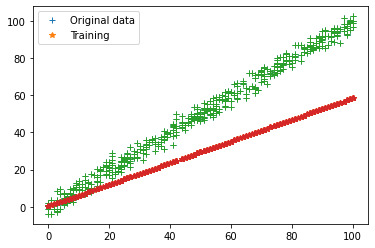

Iteration = 4, Loss = 130.14167674231228


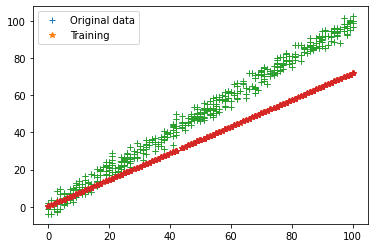

Iteration = 5, Loss = 61.19244668091982


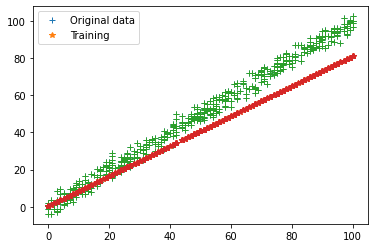

Iteration = 6, Loss = 29.910104087111634


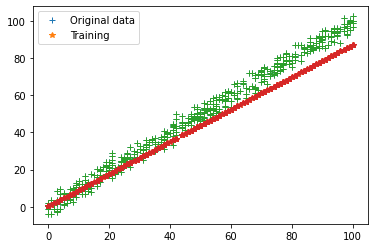

Iteration = 7, Loss = 15.71727005877068


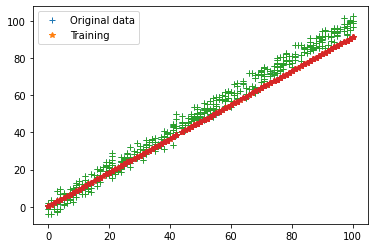

Iteration = 8, Loss = 9.277964995653685


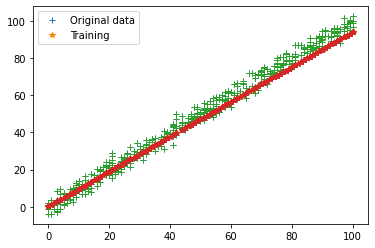

Iteration = 9, Loss = 6.356444612214409


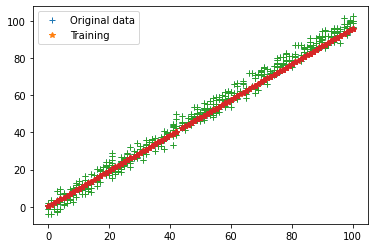

Iteration = 10, Loss = 5.03094703441561


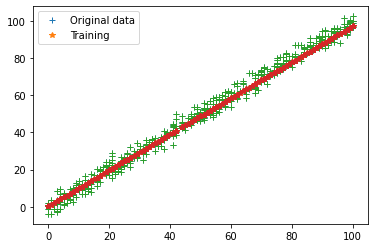

Iteration = 11, Loss = 4.429566771383926


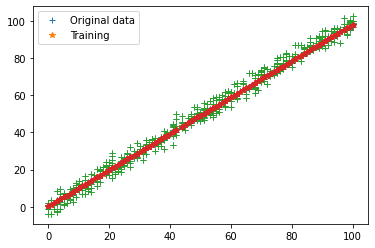

Iteration = 12, Loss = 4.156719336151644


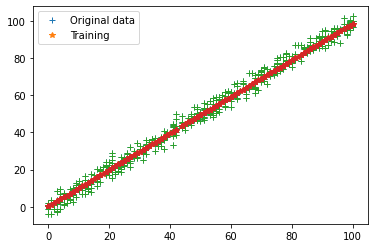

Iteration = 13, Loss = 4.032927608815857


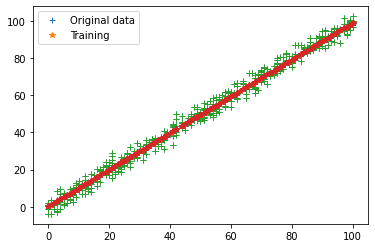

Iteration = 14, Loss = 3.9767626212803457


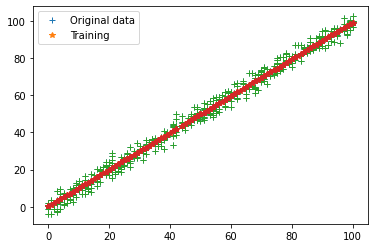

Iteration = 15, Loss = 3.951279960525766


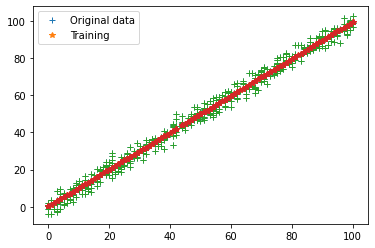

Iteration = 16, Loss = 3.939717905444097


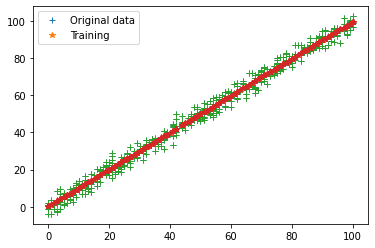

Iteration = 17, Loss = 3.934471644602651


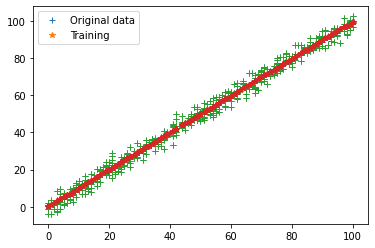

Iteration = 18, Loss = 3.932090866631011


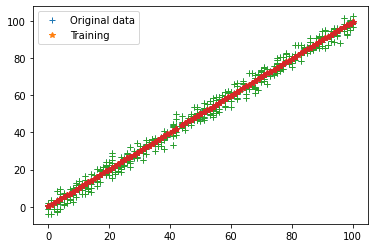

Iteration = 19, Loss = 3.9310101614387145


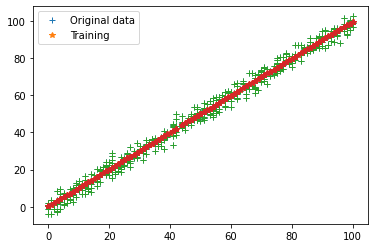

Iteration = 20, Loss = 3.930519300733802


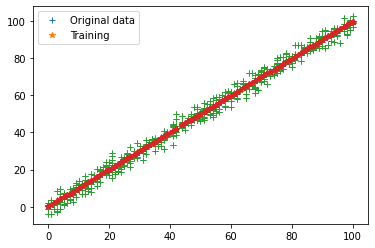

In [16]:
parameters, loss = train(train_input, train_output, 0.0001, 20)